# **Exploratory Data Analysis**

In [2]:
# Import relevant Libraries and load cleaned csv file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('../data/healthcare-dataset-stroke-data-cleaned.csv')

In [3]:
# Printing head
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Verifying integrity
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## *Total Stroke Events*

In [6]:
# Calculating total number of strokes
strokes = df.stroke.value_counts()
strokes

stroke
0    4861
1     249
Name: count, dtype: int64

In [7]:
print(f"About{strokes.iloc[1]/df.shape[0]: .2%} of the {df.shape[0]} people in our dataset experienced a stroke event.")

About 4.87% of the 5110 people in our dataset experienced a stroke event.


## *Stroke Events by Gender*

In [9]:
# Calculating total strokes by gender
strokes_by_gender = df.groupby('gender')['stroke'].sum()
strokes_by_gender

gender
Female    141
Male      108
Other       0
Name: stroke, dtype: int64

In [10]:
# Gathering total counts per gender
gender_counts = df.gender.value_counts()
gender_counts

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [11]:
# Calculating stroke percentages per gender
female_stroke_percentage = strokes_by_gender.loc['Female'] / gender_counts.loc['Female']
male_stroke_percentage = strokes_by_gender.loc['Male'] / gender_counts.loc['Male']
other_stroke_percentage = strokes_by_gender.loc['Other'] / gender_counts.loc['Other']

print(f"Percentage of females that experienced a stroke event: {female_stroke_percentage: .2%}")
print(f"Percentage of males that experienced a stroke event: {male_stroke_percentage: .2%}")
print(f"Percentage of other genders that experienced a stroke event: {other_stroke_percentage: .2%}")

Percentage of females that experienced a stroke event:  4.71%
Percentage of males that experienced a stroke event:  5.11%
Percentage of other genders that experienced a stroke event:  0.00%


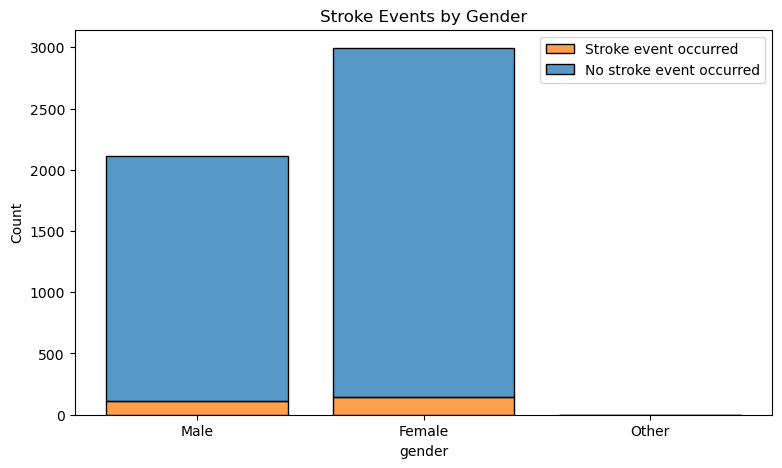

In [12]:
# Verifying results with a visual
# Setting figure size
fig = plt.figure(figsize=(9, 5))

# Creating histogram
_ = sns.histplot(
    df, 
    x='gender', 
    hue='stroke',
    multiple='stack',
    shrink=0.8
)

# Creating appropriate labels
_ = plt.title('Stroke Events by Gender')
_ = plt.legend(['Stroke event occurred', 'No stroke event occurred'])
plt.show()

While the absolute frequency for a stroke event in females was higher than in males, the relative frequency was higher in males. This suggests that males are possibly more at risk for experiencing a stroke event than females in our dataset. However since the percentages are fairly close, there is not strong evidence for such a claim.

## *Stroke Events by Age*

In [15]:
# Creating a copy of original DataFrame
df_copy = df.copy(deep=True)

# Creating age bins, assigning values to a new column in DataFrame copy, sorting DataFrame copy by age ranges (for better plotting later)
age_bins = pd.cut(x=df_copy['age'], bins=[*range(0, 100, 10)])
df_copy['age_range'] = age_bins
df_copy = df_copy.sort_values('age_range')

# Calculating strokes by age range
strokes_by_age_range = df_copy.groupby(by='age_range', observed=False)['stroke'].sum()
strokes_by_age_range

age_range
(0, 10]       1
(10, 20]      1
(20, 30]      0
(30, 40]      6
(40, 50]     15
(50, 60]     49
(60, 70]     49
(70, 80]    105
(80, 90]     23
Name: stroke, dtype: int64

In [16]:
# Gathering total counts per age range
age_range_counts = df_copy['age_range'].value_counts(sort=False)
age_range_counts

age_range
(0, 10]     507
(10, 20]    518
(20, 30]    545
(30, 40]    674
(40, 50]    739
(50, 60]    823
(60, 70]    594
(70, 80]    594
(80, 90]    116
Name: count, dtype: int64

In [17]:
# Creating for loop to calculate percentages for each age group
for i in range(len(strokes_by_age_range)):
    stroke_percentage = strokes_by_age_range.iloc[i] / age_range_counts.iloc[i]
    print(f"Percentage of {strokes_by_age_range.index[i]} year olds that expereinced a stroke: {stroke_percentage: .2%}")

Percentage of (0, 10] year olds that expereinced a stroke:  0.20%
Percentage of (10, 20] year olds that expereinced a stroke:  0.19%
Percentage of (20, 30] year olds that expereinced a stroke:  0.00%
Percentage of (30, 40] year olds that expereinced a stroke:  0.89%
Percentage of (40, 50] year olds that expereinced a stroke:  2.03%
Percentage of (50, 60] year olds that expereinced a stroke:  5.95%
Percentage of (60, 70] year olds that expereinced a stroke:  8.25%
Percentage of (70, 80] year olds that expereinced a stroke:  17.68%
Percentage of (80, 90] year olds that expereinced a stroke:  19.83%


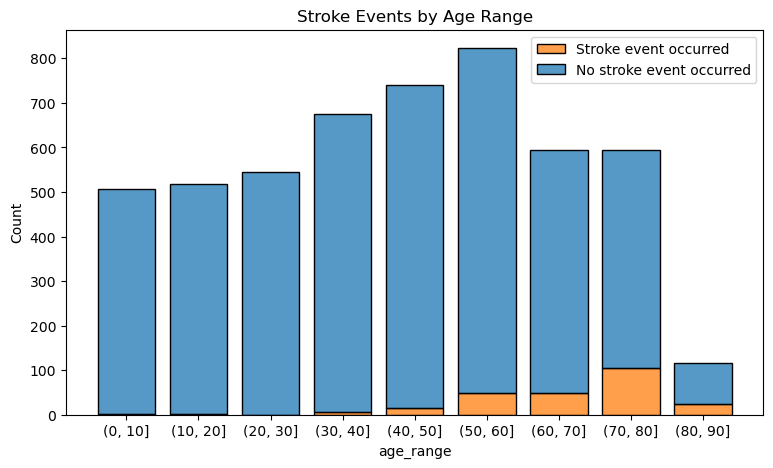

In [18]:
# Verifying results with a visual
# Setting figure size
fig = plt.figure(figsize=(9, 5))

# Creating histogram
_ = sns.histplot( 
    data=df_copy,
    x=df_copy['age_range'].astype(str),
    hue='stroke',
    multiple='stack',
    shrink=0.8
)

# Creating appropriate labels
_ = plt.title('Stroke Events by Age Range')
_ = plt.legend(['Stroke event occurred', 'No stroke event occurred'])
plt.show()

It seems that an older age is correlated with a higher chance of experiencing a stroke.

## *Stroke Events by Hypertension*

In [21]:
# Calculating strokes by hypertension where 0 is False and 1 is True
strokes_by_hypertension = df.groupby('hypertension')['stroke'].sum()
strokes_by_hypertension

hypertension
0    183
1     66
Name: stroke, dtype: int64

In [22]:
# Gathering total counts for hypertension and non-hypertension individuals
hypertension_counts = df.hypertension.value_counts()
hypertension_counts

hypertension
0    4612
1     498
Name: count, dtype: int64

In [23]:
# Calculating stroke percentages by hypertension
non_hypertension_stroke_percentage = strokes_by_hypertension.iloc[0] / hypertension_counts.iloc[0]
hypertension_stroke_percentage = strokes_by_hypertension.iloc[1] / hypertension_counts.iloc[1]

print(f"Percentage of those without hypertension that experienced a stroke event: {non_hypertension_stroke_percentage: .2%}")
print(f"Percentage of those with hypertension that experienced a stroke event: {hypertension_stroke_percentage: .2%}")

Percentage of those without hypertension that experienced a stroke event:  3.97%
Percentage of those with hypertension that experienced a stroke event:  13.25%


Individuals with hypertension in our dataset saw around a 10% increased chance of a stroke occurring.

## *Stroke Events by Heart Disease*

In [26]:
# Calculating strokes by heart disease where 0 is False and 1 is True
strokes_by_heart_disease = df.groupby('heart_disease')['stroke'].sum()
strokes_by_heart_disease

heart_disease
0    202
1     47
Name: stroke, dtype: int64

In [27]:
# Gathering total counts for heart disease and non-heart disease individuals
heart_disease_counts = df.heart_disease.value_counts()
heart_disease_counts

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [28]:
# Calculating stroke percentages by heart disease
non_heart_disease_stroke_percentage = strokes_by_heart_disease.iloc[0] / heart_disease_counts.iloc[0]
heart_disease_stroke_percentage = strokes_by_heart_disease.iloc[1] / heart_disease_counts.iloc[1]

print(f"Percentage of those without heart disease that experienced a stroke event: {non_heart_disease_stroke_percentage: .2%}")
print(f"Percentage of those with heart disease that experienced a stroke event: {heart_disease_stroke_percentage: .2%}")

Percentage of those without heart disease that experienced a stroke event:  4.18%
Percentage of those with heart disease that experienced a stroke event:  17.03%


Individuals with heart disease in our dataset were about four times more likely to experience a stroke event.

## *Stroke Events by Marriage History*

In [31]:
# Calculating strokes by marriage history
strokes_by_ever_married = df.groupby('ever_married')['stroke'].sum()
strokes_by_ever_married

ever_married
No      29
Yes    220
Name: stroke, dtype: int64

In [32]:
# Gathering total counts for individuals with and without a marriage history
ever_married_counts = df.ever_married.value_counts(ascending=True)
ever_married_counts

ever_married
No     1757
Yes    3353
Name: count, dtype: int64

In [33]:
# Calculating stroke percentages by marriage history
no_ever_married_stroke_percentage = strokes_by_ever_married.iloc[0] / ever_married_counts.iloc[0]
yes_ever_married_stroke_percentage = strokes_by_ever_married.iloc[1] / ever_married_counts.iloc[1]

print(f"Percentage of those without a marriage history that experienced a stroke event: {no_ever_married_stroke_percentage: .2%}")
print(f"Percentage of those with a marriage history that experienced a stroke event: {yes_ever_married_stroke_percentage: .2%}")

Percentage of those without a marriage history that experienced a stroke event:  1.65%
Percentage of those with a marriage history that experienced a stroke event:  6.56%


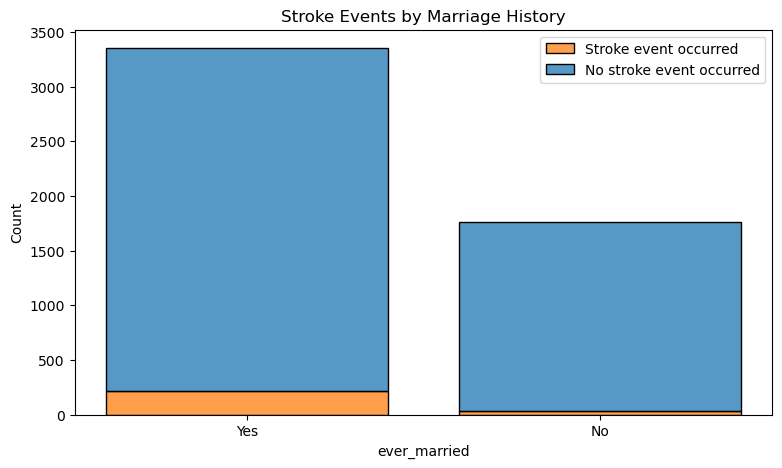

In [34]:
# Verifying results with a visual
# Setting figure size
fig = plt.figure(figsize=(9, 5))

# Creating histogram
_ = sns.histplot(
    df, 
    x='ever_married', 
    hue='stroke',
    multiple='stack',
    shrink=0.8
)

# Creating appropriate labels
_ = plt.title('Stroke Events by Marriage History')
_ = plt.legend(['Stroke event occurred', 'No stroke event occurred'])
plt.show()

Individuals with a marriage history see a slightly higher chance of a stroke event occurring.

## *Stroke Event by Work Type*

In [37]:
# Calculating strokes by work type
strokes_by_work_type = df.groupby('work_type')['stroke'].sum().sort_values(ascending=False)
strokes_by_work_type

work_type
Private          149
Self-employed     65
Govt_job          33
children           2
Never_worked       0
Name: stroke, dtype: int64

In [38]:
# Gathering total counts for different work types
work_type_counts = df.work_type.value_counts(sort=False)
work_type_counts

work_type
Private          2925
Self-employed     819
Govt_job          657
children          687
Never_worked       22
Name: count, dtype: int64

In [39]:
# Creating for loop to calculate percentages for each work type
for i in range(len(strokes_by_work_type)):
    stroke_percentage = strokes_by_work_type.iloc[i] / work_type_counts.iloc[i]
    print(f"Percentage of those with work type '{strokes_by_work_type.index[i]}' that expereinced a stroke: {stroke_percentage: .2%}")

Percentage of those with work type 'Private' that expereinced a stroke:  5.09%
Percentage of those with work type 'Self-employed' that expereinced a stroke:  7.94%
Percentage of those with work type 'Govt_job' that expereinced a stroke:  5.02%
Percentage of those with work type 'children' that expereinced a stroke:  0.29%
Percentage of those with work type 'Never_worked' that expereinced a stroke:  0.00%


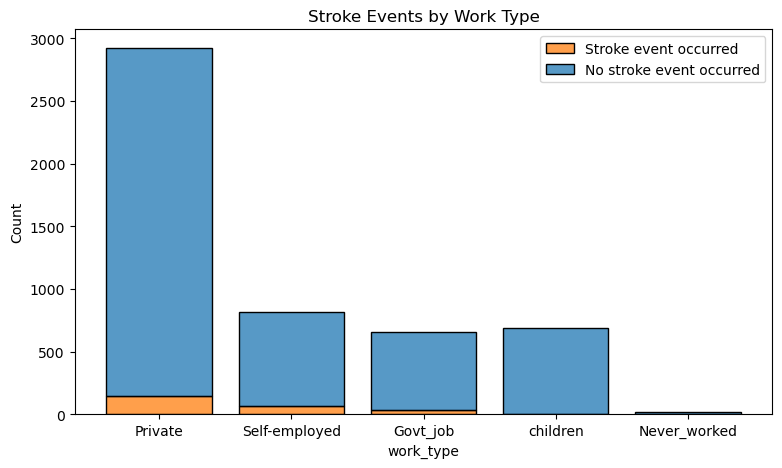

In [40]:
# Verifying results with a visual
# Setting figure size
fig = plt.figure(figsize=(9, 5))

# Creating histogram
_ = sns.histplot(
    df, 
    x='work_type', 
    hue='stroke',
    multiple='stack',
    shrink=0.8
)

# Creating appropriate labels
_ = plt.title('Stroke Events by Work Type')
_ = plt.legend(['Stroke event occurred', 'No stroke event occurred'])
plt.show()

Those with work type 'Self-employed' seemed a little more likely to experience a stroke in our dataset, but not by much.

## *Stroke Events by Residence Type*

In [43]:
# Calculating strokes by residence type
strokes_by_residence_type = df.groupby('Residence_type')['stroke'].sum().sort_values(ascending=False)
strokes_by_residence_type

Residence_type
Urban    135
Rural    114
Name: stroke, dtype: int64

In [44]:
# Gathering total counts for different residence types
residence_type_counts = df.Residence_type.value_counts()
residence_type_counts

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [45]:
# Calculating stroke percentages by residence type
urban_stroke_percentage = strokes_by_residence_type.iloc[0] / residence_type_counts.iloc[0]
rural_stroke_percentage = strokes_by_residence_type.iloc[1] / residence_type_counts.iloc[1]

print(f"Percentage of urban residents that experienced a stroke event: {urban_stroke_percentage: .2%}")
print(f"Percentage of rural residents that experienced a stroke event: {rural_stroke_percentage: .2%}")

Percentage of urban residents that experienced a stroke event:  5.20%
Percentage of rural residents that experienced a stroke event:  4.53%


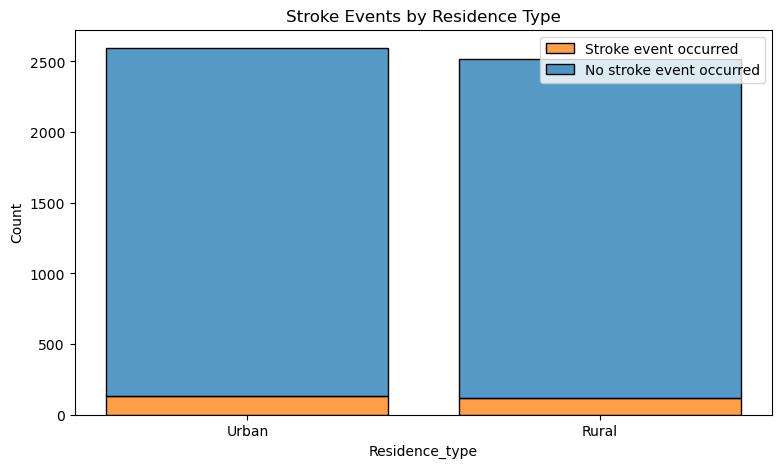

In [46]:
# Verifying results with a visual
# Setting figure size
fig = plt.figure(figsize=(9, 5))

# Creating histogram
_ = sns.histplot(
    df, 
    x='Residence_type', 
    hue='stroke',
    multiple='stack',
    shrink=0.8
)

# Creating appropriate labels
_ = plt.title('Stroke Events by Residence Type')
_ = plt.legend(['Stroke event occurred', 'No stroke event occurred'])
plt.show()

There does not seem to be evidence to support claims that residence type makes an individual in this dataset more or less likely to have a stroke.

## *Stroke Events by Average Glucose Level*

In [49]:
# Creating a copy of original DataFrame
df_copy = df.copy(deep=True)

# Creating glucose level bins
# Bins were created using the following optimal levels for blood glucose (Mean Blood mg/dL)
# 50-80: Hypoglycemia
# 80-150: Excellent
# 150-180: Hyperglycemia
# 180-280: Diabetes
glucose_level_bins = pd.cut(x=df_copy['avg_glucose_level'], 
                            bins=[50, 80, 150, 180, 280], 
                            labels=['Hypoglycemia', 'Excellent', 'Hyperglycemia', 'Diabetes'])

# Assigning values to a new column in DataFrame copy and sorting DataFrame copy by glucose ranges (for better plotting later)
df_copy['glucose_range'] = glucose_level_bins
df_copy = df_copy.sort_values('glucose_range')

# Calculating strokes by glucose range
strokes_by_glucose_range = df_copy.groupby(by='glucose_range', observed=False)['stroke'].sum()
strokes_by_glucose_range

glucose_range
Hypoglycemia     63
Excellent        96
Hyperglycemia    11
Diabetes         79
Name: stroke, dtype: int64

In [50]:
# Gathering total counts per glucose range
glucose_range_counts = df_copy['glucose_range'].value_counts(sort=False)
glucose_range_counts

glucose_range
Hypoglycemia     1532
Excellent        2848
Hyperglycemia     147
Diabetes          583
Name: count, dtype: int64

In [51]:
# Creating for loop to calculate percentages for each glucose group
for i in range(len(strokes_by_glucose_range)):
    stroke_percentage = strokes_by_glucose_range.iloc[i] / glucose_range_counts.iloc[i]
    print(f"Percentage of those with '{strokes_by_glucose_range.index[i]}' type glucose levels that expereinced a stroke: {stroke_percentage: .2%}")

Percentage of those with 'Hypoglycemia' type glucose levels that expereinced a stroke:  4.11%
Percentage of those with 'Excellent' type glucose levels that expereinced a stroke:  3.37%
Percentage of those with 'Hyperglycemia' type glucose levels that expereinced a stroke:  7.48%
Percentage of those with 'Diabetes' type glucose levels that expereinced a stroke:  13.55%


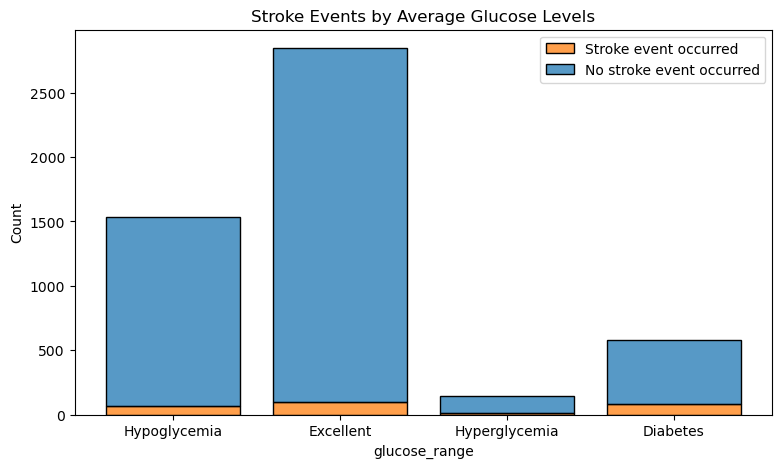

In [52]:
# Verifying results with a visual
# Setting figure size
fig = plt.figure(figsize=(9, 5))

# Creating histogram
_ = sns.histplot( 
    data=df_copy,
    x=df_copy['glucose_range'].astype(str),
    hue='stroke',
    multiple='stack',
    shrink=0.8
)

# Creating appropriate labels
_ = plt.title('Stroke Events by Average Glucose Levels')
_ = plt.legend(['Stroke event occurred', 'No stroke event occurred'])
plt.show()

Based on our findings, it seems that individuals in our dataset that were not classified as having an excellent average glucose level were more likely to have a stroke. This is especially true for those considered diabetic.

## *Stroke Events by BMI*

In [55]:
# Creating a copy of original DataFrame
df_copy = df.copy(deep=True)

# Creating bmi bins
# Bins were created using the following classifications
# <18.5: Underweight
# 18.5-25: Healthy
# 25-30: Overweight
# 30-35: Obese
# 35<: Severly Obese
bmi_bins = pd.cut(x=df_copy['bmi'], 
                  bins=[0, 18.5, 25, 30, 35, 100], 
                  labels=['Underweight', 'Healthy', 'Overweight', 'Obese', 'Severly Obese'])

# Assigning values to a new column in DataFrame copy and sorting DataFrame copy by bmi ranges (for better plotting later)
df_copy['bmi_range'] = bmi_bins
df_copy = df_copy.sort_values('bmi_range')

# Calculating strokes by bmi range
strokes_by_bmi = df_copy.groupby(by='bmi_range', observed=False)['stroke'].sum()
strokes_by_bmi

bmi_range
Underweight        1
Healthy           37
Overweight       115
Obese             54
Severly Obese     42
Name: stroke, dtype: int64

In [56]:
# Gathering total counts per bmi range
bmi_counts = df_copy['bmi_range'].value_counts(sort=False)
bmi_counts

bmi_range
Underweight       349
Healthy          1258
Overweight       1610
Obese             985
Severly Obese     908
Name: count, dtype: int64

In [57]:
# Creating for loop to calculate percentages for each bmi group
for i in range(len(strokes_by_bmi)):
    stroke_percentage = strokes_by_bmi.iloc[i] / bmi_counts.iloc[i]
    print(f"Percentage of those with '{strokes_by_bmi.index[i]}' type BMI that expereinced a stroke: {stroke_percentage: .2%}")

Percentage of those with 'Underweight' type BMI that expereinced a stroke:  0.29%
Percentage of those with 'Healthy' type BMI that expereinced a stroke:  2.94%
Percentage of those with 'Overweight' type BMI that expereinced a stroke:  7.14%
Percentage of those with 'Obese' type BMI that expereinced a stroke:  5.48%
Percentage of those with 'Severly Obese' type BMI that expereinced a stroke:  4.63%


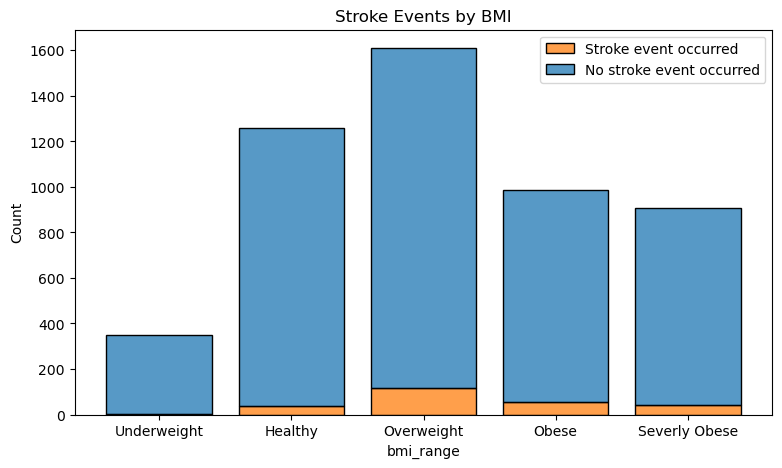

In [58]:
# Verifying results with a visual
# Setting figure size
fig = plt.figure(figsize=(9, 5))

# Creating histogram
_ = sns.histplot( 
    data=df_copy,
    x=df_copy['bmi_range'].astype(str),
    hue='stroke',
    multiple='stack',
    shrink=0.8
)

# Creating appropriate labels
_ = plt.title('Stroke Events by BMI')
_ = plt.legend(['Stroke event occurred', 'No stroke event occurred'])
plt.show()

Individuals in our dataset classified as overweight or obese by their BMI results were more likely to experience a stroke even than individuals classified as healthy or underweight by their BMI. However, the percentages do not suggest BMI has a huge influence on a stroke event occurring.

**Side Note:** Upon examining the minimum and maximum values to calculate ranges for the above bins, I noticed that there were some very high BMIs nearing 100. I am not entirely sure if this is even possible, and my limited medical knowledge does not equip me to properly answer this question. If it is the case that these values are not feasible, then this could certainly have an effect on this analysis although the degree of this effect could be limited.

## *Stroke Events by Smoking Status*

In [62]:
# Calculating stroke by smoking status
strokes_by_smoking_status = df.groupby('smoking_status', sort=False)['stroke'].sum()
strokes_by_smoking_status

smoking_status
formerly smoked    70
never smoked       90
smokes             42
Unknown            47
Name: stroke, dtype: int64

In [63]:
# Gathering total counts for different smoking status types
smoking_status_counts = df.smoking_status.value_counts(sort=False)
smoking_status_counts

smoking_status
formerly smoked     885
never smoked       1892
smokes              789
Unknown            1544
Name: count, dtype: int64

In [64]:
# Creating for loop to calculate percentages for each smoking status type
for i in range(len(strokes_by_smoking_status)):
    stroke_percentage = strokes_by_smoking_status.iloc[i] / smoking_status_counts.iloc[i]
    print(f"Percentage of those with smoking status type '{strokes_by_smoking_status.index[i]}' that expereinced a stroke: {stroke_percentage: .2%}")

Percentage of those with smoking status type 'formerly smoked' that expereinced a stroke:  7.91%
Percentage of those with smoking status type 'never smoked' that expereinced a stroke:  4.76%
Percentage of those with smoking status type 'smokes' that expereinced a stroke:  5.32%
Percentage of those with smoking status type 'Unknown' that expereinced a stroke:  3.04%


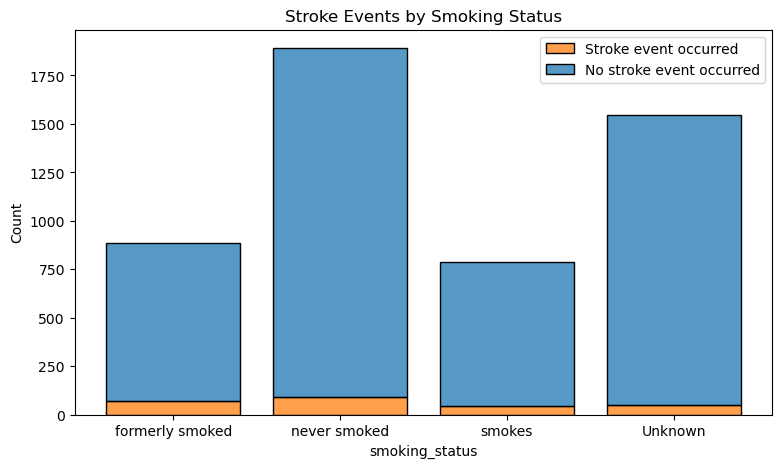

In [65]:
# Verifying results with a visual
# Setting figure size
fig = plt.figure(figsize=(9, 5))

# Creating histogram
_ = sns.histplot(
    df, 
    x='smoking_status', 
    hue='stroke',
    multiple='stack',
    shrink=0.8
)

# Creating appropriate labels
_ = plt.title('Stroke Events by Smoking Status')
_ = plt.legend(['Stroke event occurred', 'No stroke event occurred'])
plt.show()

While smokers may have been believed to lead this category, it is actually former smokers in our dataset that have experienced more strokes relatively. Smokers have the second highest risk with non-smokers close behind. This suggests that smoking status may not have a huge impact on whether a stroke event occurs (although we may be unknowingly showcasing response bias).

## *Summary of Frequency Analysis*

Hypertension, heart disease, older age, high average glucose levels (specifically diabetes), and marriage status seem to be potentially significant predictors of a stroke event occurring. Let's see whether the correlation coefficients paint a similar picture.

## *Encoding Data*

In [70]:
# Creating copy of original DataFrame
df_encoded = df.copy(deep=True)

# Inititalizing OneHotEncoder object
enc = OneHotEncoder()

# Creating definition to encode columns of interest
def encode_column(column, df):
    df_column = pd.DataFrame(enc.fit_transform(df[[column]]).toarray())
    df_column.columns = enc.get_feature_names_out()
    return df_column

# Joining encoded columns to DataFrame copy
df_encoded = df_encoded.join([
    encode_column('gender', df),
    encode_column('ever_married', df),
    encode_column('work_type', df),
    encode_column('Residence_type', df),
    encode_column('smoking_status', df)
])

# List of columns to drop
columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Dropping columns from DataFrame copy
df_encoded.drop(columns, axis=1, inplace=True)

# Verifying results
df_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,202.21,28.1,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## *Correlation Coefficients*

In [72]:
# Determining most exterme coefficients (largest)
df_encoded.corr().loc[:, ['stroke']].nlargest(6, columns='stroke')

,stroke
stroke,1.000000
age,0.245257
heart_disease,0.134914
avg_glucose_level,0.131945
hypertension,0.127904
ever_married_Yes,0.108340


In [73]:
# Determining most extreme coefficients (smallest)
df_encoded.corr().loc[:, ['stroke']].nsmallest(5, columns='stroke')

,stroke
ever_married_No,-0.108340
work_type_children,-0.083869
smoking_status_Unknown,-0.055892
Residence_type_Rural,-0.015458
work_type_Never_worked,-0.014882


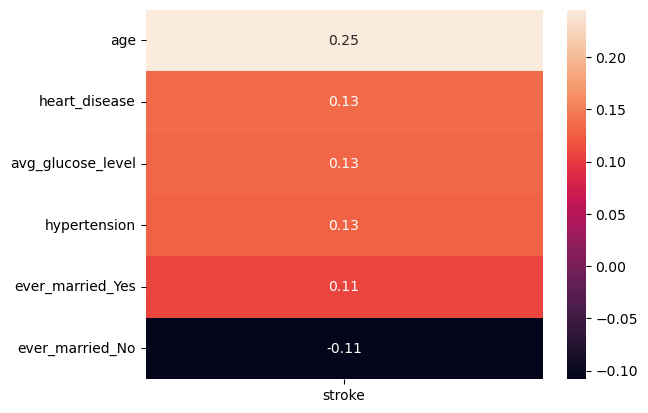

In [74]:
# Creating heatmap of strongest correlations
sns.heatmap(df_encoded.corr().loc[['age', 'heart_disease', 'avg_glucose_level', 'hypertension', 'ever_married_Yes', 'ever_married_No'], ['stroke']],
            annot=True);

## *Final Thoughts*

As expected, age, heart disease, average glucose level, hypertension, and marriage status display the highest correlation coefficients. This gives us the answer to the question raised at the beginning of this project, but let's see if we can go a step further and create a model capable of predicting a stroke event given health data similar to what we have available.